### Predicting the Success of Telemarketing Campaign

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [2]:
df=pd.read_excel('bank_telemarketing.xlsx')

In [3]:
#Checking the number of Rows and columns in the data
df.shape 

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- 'y' is the target variable.

In [5]:
#Checking which features or variables are numeric or categorical in the data
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

- euribor3m is lending rate within each bank.

# Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Label the Target feature to 1/0

In [8]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
df['target']=np.where(df['y']=="yes",1,0)

# Drop the Target feature to retain only Target 

In [10]:
df=df.drop(['y'],axis=1)

# Defining Target and Independent Features

In [11]:
Y=df[['target']]

X=df.drop(['target'],axis=1)

# Get the Event Rate

In [12]:
Y.mean()

target    0.112654
dtype: float64

- 11.2% is the event rate.
- This is the baseline likelihood of term depositors in the data. This tells us that on an average 11.2% of the calls made, got converted into successful term deposits in the Bank.

# Split features into Numerical and Categorical

In [13]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [14]:
num.dtypes # Numerical features

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [15]:
char.dtypes # Character features

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
dtype: object

In [16]:
# function to check for the unique value counts of all the numeric features
def unique_levels(x):   
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))
df_value_counts

,0
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [17]:
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


- Features previous'previous', 'emp.var.rate'& 'nr.employed' have less than 20 levels. For these variables, breaking into deciles will be an issue, because not even 10 ranks out of a feature 'previous', can be created. 8 unique levels of 'previous' can't be broken apart into 10 Ranks. 
- This variable 'previous' will be treated as categorical feature.
- Ranks are based on values taken by a certain feature. 

In [18]:
# Numerical dataframe split into two parts, based on the unique levels of data
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

previous          int64
emp.var.rate    float64
nr.employed     float64
dtype: object

In [19]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
dtype: object

In [20]:
char=pd.concat([char,cat],axis=1,join="inner") # cat data-frame created by splitting the numerical dataframe, now concatenated with the Character dataframe

In [21]:
char.head() # Updated one

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,previous,emp.var.rate,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0,1.1,5191.0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0,1.1,5191.0


In [22]:
num.head()

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,93.994,-36.4,4.857
1,57,149,1,999,93.994,-36.4,4.857
2,37,226,1,999,93.994,-36.4,4.857
3,40,151,1,999,93.994,-36.4,4.857
4,56,307,1,999,93.994,-36.4,4.857


# Outlier Analysis of Numerical Features

In [23]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,186.910907,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,92.201000,-50.800000,0.634000
1%,23.00000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
5%,26.00000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.00000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.00000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


- Caps for variables age, duration, campaign & euribor3m are less than their respective maximum values.
- Also, the Floors variables age, duration, pdays, cons.conf.idx & euribor3m are more than their repective minimum values. 
- So, there are outliers present in variables:- age, duration, campaign, pdays, cons.conf.idx & euribor3m.

In [24]:
cap = df.quantile(0.99)     # Displays 99% Quantile values for all variables
cap

age                 71.000
duration          1271.130
campaign            14.000
pdays              999.000
previous             2.000
emp.var.rate         1.400
cons.price.idx      94.465
cons.conf.idx      -26.900
euribor3m            4.968
nr.employed       5228.100
target               1.000
Name: 0.99, dtype: float64

In [25]:
floor = df.quantile(0.01)     # Displays 1% Quantile values for all variables
floor

age                 23.00000
duration            11.00000
campaign             1.00000
pdays                3.00000
previous             0.00000
emp.var.rate        -3.40000
cons.price.idx      92.20100
cons.conf.idx      -49.50000
euribor3m            0.65848
nr.employed       4963.60000
target               0.00000
Name: 0.01, dtype: float64

# Capping and Flooring of outliers

In [26]:
def outlier_cap(x):                           #Caps the values at 99th percentile and Floor their values at 1st percentile
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [27]:
num=num.apply(lambda x : outlier_cap(x))

In [28]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.976644,254.379784,2.500024,962.479290,93.574052,-40.495137,3.621394
std,10.138262,235.184174,2.301191,186.891194,0.576030,4.612905,1.734194
min,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
1%,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658932
5%,26.000000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.000000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.000000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.000000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.000000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


# Missing Value Analysis

In [29]:
num.isnull().mean()

age               0.0
duration          0.0
campaign          0.0
pdays             0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
dtype: float64

- The data is clean, and does not need Missing value imputation. In Real life situations, we are rarely this lucky.

In [30]:
# Since the data does not contain any missing values Imputation Processes are not required
# In case there are missing values in the data, then please remove those columns or features that have more than 25% of rows as missing
# Snippet used in case there are any missing value challenges
# X = X.loc[:, X.isnull().mean() <= .25]

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [31]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [32]:
num_1.iloc[0]

age                56.000
duration          261.000
campaign            1.000
pdays             999.000
cons.price.idx     93.994
cons.conf.idx     -36.400
euribor3m           4.857
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [33]:
# Snippet breaks each feature apart into 10 deciles
from sklearn.preprocessing import KBinsDiscretizer       # Class 'KBinsDiscretizer' is imported from sklearn library  
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')     # Object 'discrete' with these parameters
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')   # method 'fir_transform' is applied over original data-frames
# Output of fit_transform gives n-dimensional array, which is converted into pandas dataframe. Suffix '_Rank' applied to all columns.
num_binned.head()

,age_Rank,duration_Rank,campaign_Rank,pdays_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank
0,9.0,6.0,0.0,0.0,6.0,6.0,5.0
1,9.0,4.0,0.0,0.0,6.0,6.0,5.0
2,4.0,6.0,0.0,0.0,6.0,6.0,5.0
3,5.0,4.0,0.0,0.0,6.0,6.0,5.0
4,9.0,7.0,0.0,0.0,6.0,6.0,5.0


- Bivariate Analysis is a great way to look at the predictive power of the feature, and also visualise the predictive power of the feature
- Bivariate analysis will be done for both numerical and categorical data. But for numerical, because the features are in the continuous form, these need to be converted to a discrete form. So, every feature will be converted into a ranked form from 0-9 (0 indicates the lowest of values, and 9 indicates the highest of the values)
- Deciles will be created, and based on the 10 percentile points, deciles are created. Then, ranks assigned to these deciles in order.
- Since, we are iterating over so many columns, it calls for looping, but it wouldn't be feasible for large number of features.
- Class 'KBinsDiscretizer', with encode='ordinal', strategy='quantile' makes the task of assigning ranks to groups, very easy.
- In case of 'quantile' strategy, the volume of data will be same across all the deciles, but the class-intervals won't be same.
- loan_amnt_Rank=0 means that is the lowest 10% of the loan amount.
- loan_amnt_Rank=9 indicates the highest 10% of the loan amount values.
- data-frame 'num_binned' gets created with ranked form of every single feature.
- The reason why this snippet is being run, is to access the impact of the ranks of features, on the event rate.
- Ranked versions of each of these features are obtained.

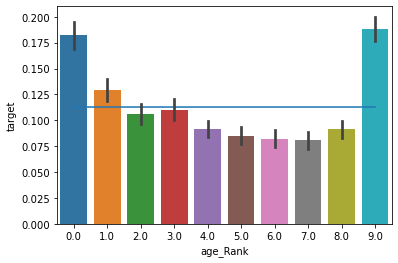

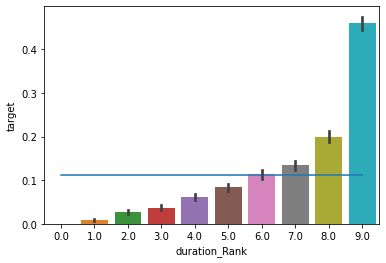

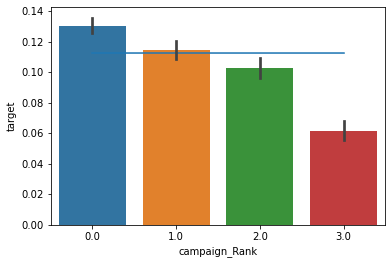

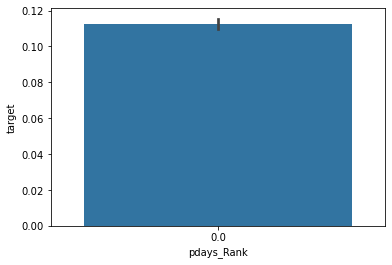

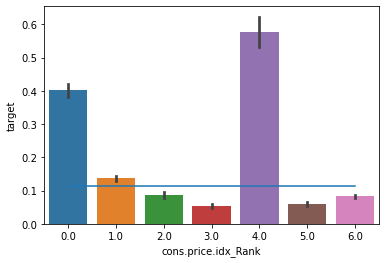

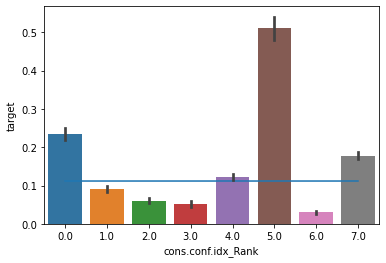

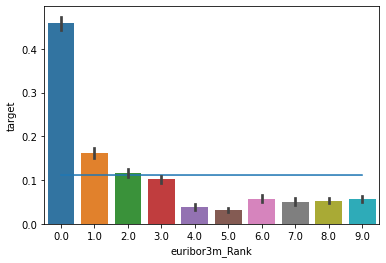

In [34]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['target'].mean(),data=X_bin_combined)
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

- Bivariate graphs created
- Horizontal line has been drawn to show the average target rate or average event rate.
- Variable 'tenure' discriminates bw the average event rate on either sides of it.
- age is not a good predictor.
- duration is a good predictor. 
- campaign is also not banned, because with the number of times, the person has been contacted, its logical that the conversion will go down. The lesser the number of times, the person is contacted, more the event rate. But the only issue is that event rate for Rank-0 is not very different from the event rate for Rank-1. 
- age_Rank should be dropped, because it follows a U-curve. Anything that follows a 'U' curve, is not really a good feature. 
- KBins hasn't been able to do justice with variable 'pdays'. qcut can be used instead (below snippet)
- As 'cons.price.idx' increases, the event rate steadily decreases, but at certain points cons.conf.idx=4, it breaks that linear trend, and it shoots up. This shows that there is a non-linearity  kind of outcome in this feature. So, this feature can be good for machine learning. Definitely this is not a good predictor for logistic regression, but a good predictor for Machine Learning.
- Lower the 'euribor3m' (borrowing interest rate of the bank), higher is the event rate. This is a good predictor, as it discriminates an event from non-event.
- 'cons.conf.idx' is also a good predictor, but a non-linear one.
- 'pdays' & age can be dropped.

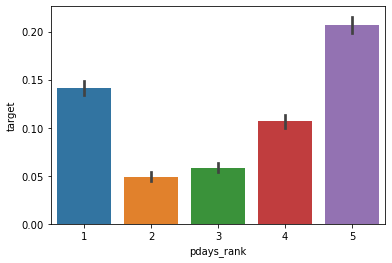

In [35]:
df['pdays_rank']=pd.qcut(df['pdays'].rank(method='first').values,5,duplicates='drop').codes+1
from numpy import mean
ax = sns.barplot(x="pdays_rank", y="target", data=df, estimator=mean)

- pdays_rank is not a good predictor, as its U shaped one. So, this variable can be dropped.

In [36]:
num_1=num_1.drop(['age','pdays'],axis=1) # these two features are dropped

In [37]:
# All features from num_1 will get selected due to good discrimination power by all of them
select_features_df_num=num_1

In [38]:
select_features_df_num.shape

(41188, 5)

# Feature Selection - Categorical Features 

# Part 1 - Bi Variate Analysis

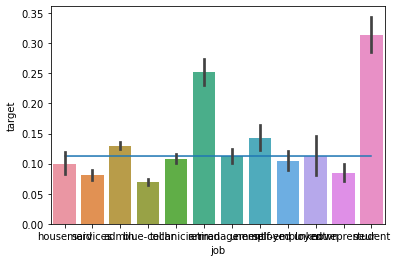

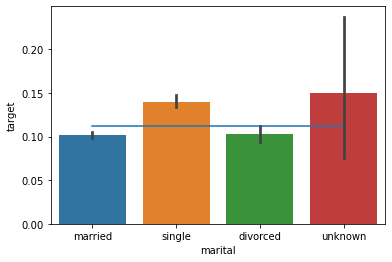

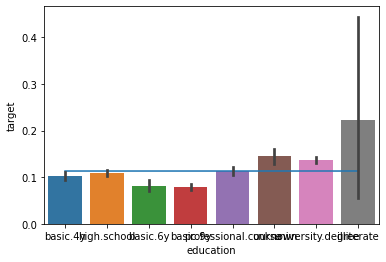

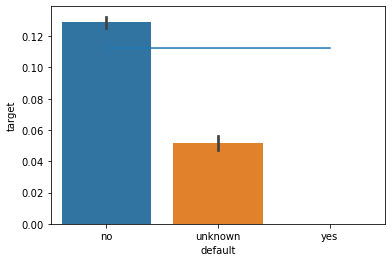

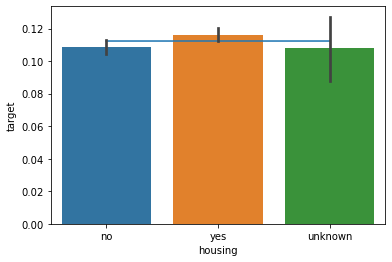

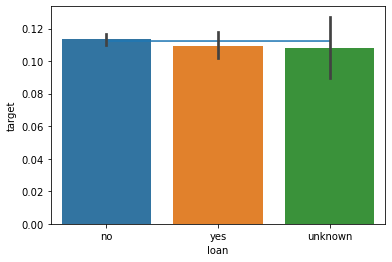

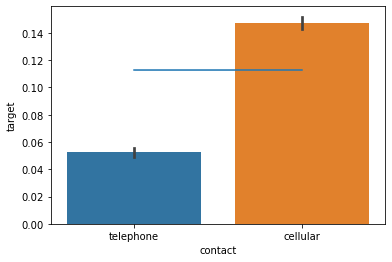

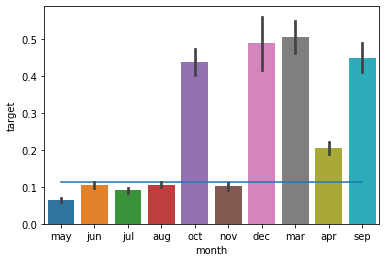

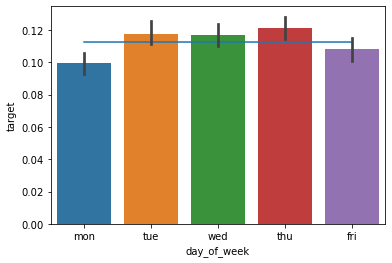

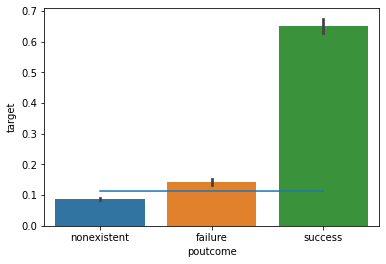

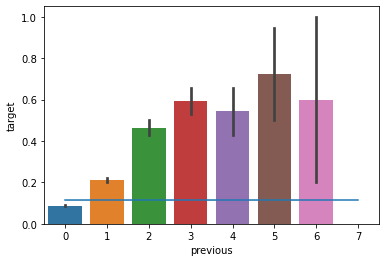

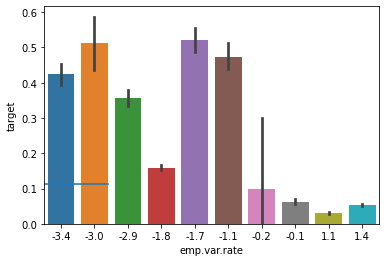

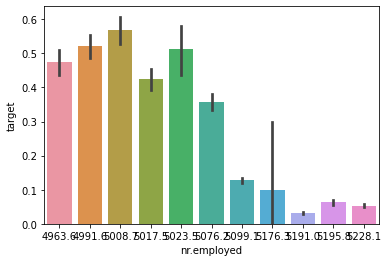

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

- target-job graph is actually not making a lot of sense.In some cases, the event rates are high. So, lets keep the 'job'  feature.
There is a lot of non-linearity present in this feature. It shoots up and down occasionally. So, ML model would be preferred over Logistic Regression one.
- 'marital' can be dropped, as its not really making a lot of difference. Its not showing that much discrimination. Because with this kind of graph, selling term deposit to a married guy would be a task.
With this kind of variable, you would end up creating more restrictions than help the bank expand their portfolio.
They would ideally try to pitch it to people irrespective of their marital status.
- Intuitively, 'education' overall doesn't make a lot of sense, and should be dropped. Level called 'illiterate' seems to be the only category to have captured around 20% responders. This doesn't make a lot of sense. Moreover, there is not much discrimination with this kind of feature.
- 'default' as a feature, takes 3 levels-'no', 'unknown' and 'yes'.
- 'housing' & 'loan' can be dropped. Flat trend in 'loan'.
- 'month' can be kept as it is. No need to convert this into categories-H1 & H2. There is a lot of non-linearity with some event rates being disproportionately higher. So, if we combine them, we will end up diluting, and it won't give the same level of discrimination. Let the month be a One-hot encoded feature. Individual months to act as predictors.
- 'day_of_week' doesn't really matter. But some later months matter. It could be that people get bonuses towards the end of the year, like oct & dec. Also, the first quarter has a good chance of getting a response to 'term-deposit' calls.
- 'previous' & 'poutcome' are also good variables.
- All categories of 'previous', excluding the first one can be clubbed into a single category. 1/0 can be formed.   

In [40]:
df.groupby('default')['target'].agg(['mean'])

,mean
default,
no,0.12879
unknown,0.05153
yes,0.00000


In [41]:
char=char.drop(['housing','education','marital','loan','day_of_week'],axis=1)

In [42]:
char['default']=np.where(char['default'] =='unknown', 'yes', char['default'])
#char['previous_ind']=np.where(char['previous'] >0, 1, 0) # 1/0 is purely nominal. This code can also be tried to see the impact on model.
#char=char.drop(['previous'],drop=1)

- '>0' because for the lowest decile in previous, the chance of response is lower than the average. All levels other than 0, have event rates higher than 11.2%. We are looking for a variable that can discriminate. One part of the feature should give lower chance of success, as compared to the average chance of success. For other part of the feature values, should have different chance of success. It can be seen that Ranks 1-6 are higher even rates than the average success value. So, combining these levels having higher event rates, seems to be a good idea.

In [43]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(41188, 27)

# Part 2 - Select K Best

In [44]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=25)   # Keeping the best 25 dummies
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

ValueError: Input X must be non-negative.

- When run, this snippet throws an error 'Input X must be non-negative'

In [45]:
pd.DataFrame(X_char_dum)['emp.var.rate'] 

0        1.1
1        1.1
2        1.1
3        1.1
4        1.1
        ... 
41183   -1.1
41184   -1.1
41185   -1.1
41186   -1.1
41187   -1.1
Name: emp.var.rate, Length: 41188, dtype: float64

- 'emp.var.rate' is negative attribute, but is considered to be categorical. SelectKBest throws an error when the values are negative.

In [46]:
X_char_dum1=X_char_dum
X_char_dum=X_char_dum.drop(['emp.var.rate'],axis=1) # Removing emp.var.rate from X_char_dum dataframe, to remove column with negative values

In [47]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=25)   # Keeping the best 25 dummies
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]
#d=pd.DataFrame({'pvalues':selector.pvalues_, 'scores':selector.scores_})

In [48]:
select_features_df_char.dtypes # Displays all the dummy features that are statistically significant

previous                  int64
nr.employed             float64
job_blue-collar           uint8
job_entrepreneur          uint8
job_housemaid             uint8
job_management            uint8
job_retired               uint8
job_self-employed         uint8
job_services              uint8
job_student               uint8
job_technician            uint8
job_unemployed            uint8
default_yes               uint8
contact_telephone         uint8
month_aug                 uint8
month_dec                 uint8
month_jul                 uint8
month_jun                 uint8
month_mar                 uint8
month_may                 uint8
month_nov                 uint8
month_oct                 uint8
month_sep                 uint8
poutcome_nonexistent      uint8
poutcome_success          uint8
dtype: object

In [49]:
selected_features_df_char = pd.DataFrame({'Feature':list(X_char_dum.columns),
                                     'Scores':selector.scores_, 'p-values':selector.pvalues_})
selected_features_df_char.sort_values(by='Scores', ascending=False)[0:25]

,Feature,Scores,p-values
1,nr.employed,5234.581603,0.000000e+00
25,poutcome_success,3982.548056,0.000000e+00
0,previous,3090.172426,0.000000e+00
19,month_mar,842.916583,2.520714e-185
22,month_oct,763.644573,4.331272e-168
23,month_sep,645.541017,2.083806e-142
14,contact_telephone,547.958309,3.500598e-121
9,job_student,355.864620,2.239058e-79
6,job_retired,335.662863,5.616159e-75
13,default_yes,321.621639,6.422083e-72


- This is a list of most statistically significant variables, in the ascending order of their p-values, or descending order of their chi-square test statistics.
- The significance of the features decreases down the list, i.e. more significant features occur over the top of the list.
- Top 25 best features obtained

In [50]:
select_features_df_char=X_char_dum1

# Creating the Master Feature Set for Model Development

In [51]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [52]:
X_all.shape

(41188, 32)

- 27(from select_features_df_char) +5(from select_features_df_num) =32 features in all.

# Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [54]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (28831, 32)
Shape of Testing Data (12357, 32)
Response Rate in Training Data target    0.111616
dtype: float64
Response Rate in Testing Data target    0.115076
dtype: float64


- These event rates are very close. So, the random state set to 10, is fine. Moreover, train:test split is 70:30.

# Model Building Step

In [55]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

- Not very confident about Logistic Regression model, because there are lot of features with non-linear kind of behaviour.

In [56]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,previous,0.185044
1,emp.var.rate,-0.144023
2,nr.employed,-0.009559
3,job_blue-collar,-0.124651
4,job_entrepreneur,-0.004172
5,job_housemaid,0.002671
6,job_management,-0.008407
7,job_retired,0.054776
8,job_self-employed,-0.005825
9,job_services,-0.051111


In [57]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [58]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist={'max_depth':[3,5,6,7],'min_samples_split':[50,100,150,200,250]}
tree_grid=GridSearchCV(dtree,cv=10,param_grid=param_dist,n_jobs=3)
tree_grid.fit(X_train,y_train)
print('Best Parameters using Grid Search: \n',tree_grid.best_params_)

Best Parameters using Grid Search: 
 {'max_depth': 6, 'min_samples_split': 150}


In [59]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=150)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=150, random_state=0)

In [60]:
# !pip install pydotplus

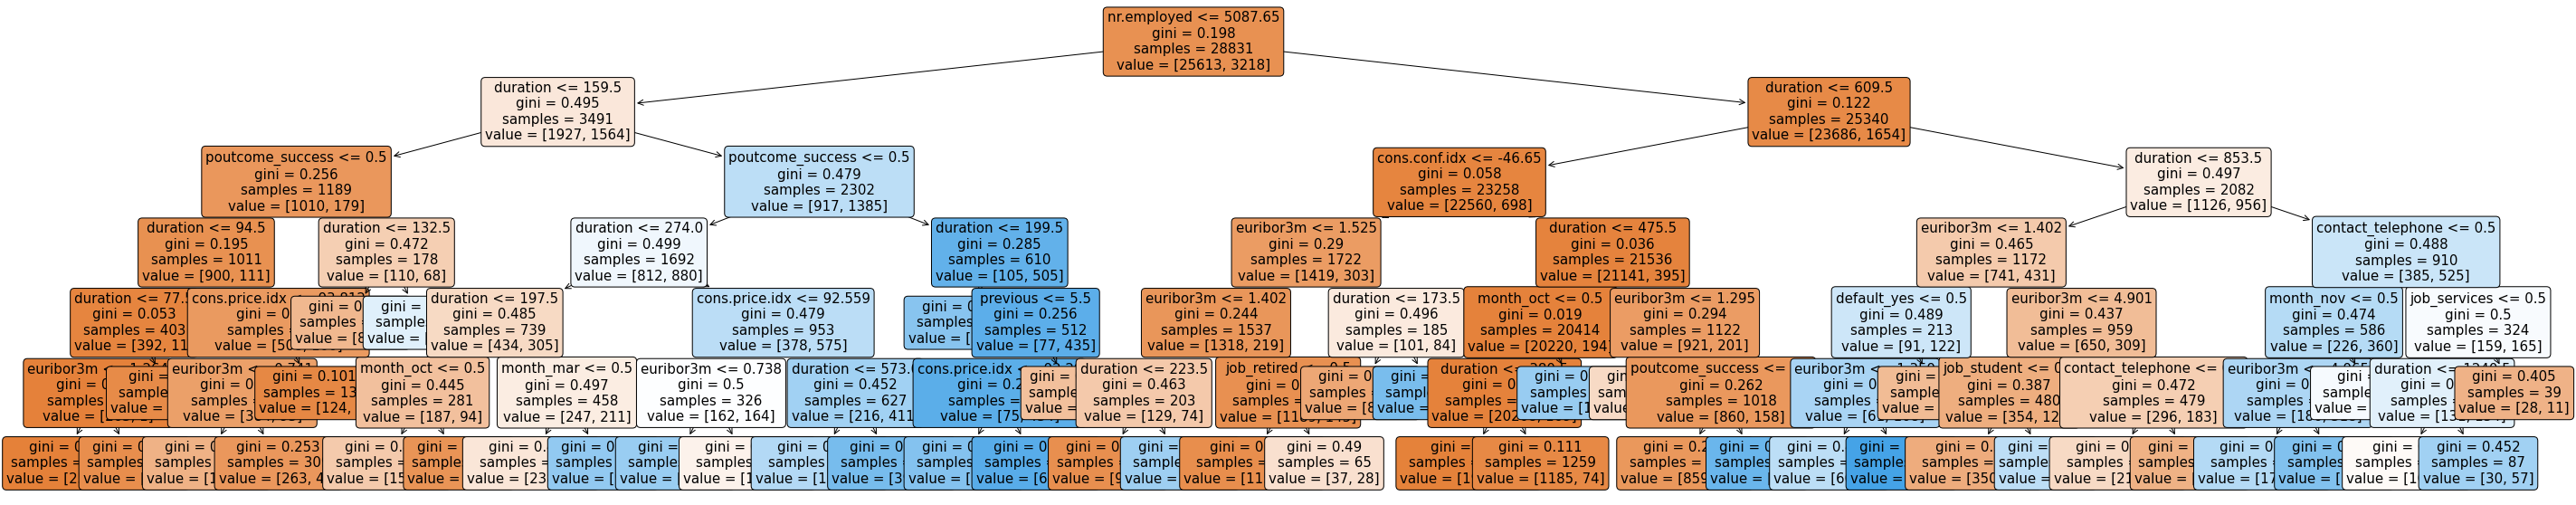

In [61]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [62]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=150)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=150, random_state=0)

In [63]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.318655
nr.employed,0.197881
euribor3m,0.141601
poutcome_success,0.100576
cons.conf.idx,0.055438
emp.var.rate,0.053722
cons.price.idx,0.042097
previous,0.018034
poutcome_nonexistent,0.011796
contact_telephone,0.011549


- It can be seen that 'emp.var.rate', SelectKBest was having an issue with, here is coming out as fairly good predictor.

In [64]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=150)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=150,
                           random_state=0)

In [65]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.463211
nr.employed,0.293983
euribor3m,0.078543
poutcome_success,0.041596
cons.conf.idx,0.033233
month_oct,0.012814
campaign,0.011002
cons.price.idx,0.010122
previous,0.006298
contact_telephone,0.006027


- Similar to RFs, it shows 'duration' as the best discriminator.

In [66]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=150)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=150))  
                       ] 

In [67]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [68]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=150,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=150,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [69]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:  # Doing everything on test data
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [71]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [72]:
# Logistic Regression test data metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.905964230800356
Precision 0.6467268623024831
Recall 0.4029535864978903
f1_score 0.49653379549393417


- Recall is just 40%. So, there are a lot of actual people, 849 (from Confusion Matrix) who are interested in term deposit which Logistic Regression will not be able to capture.

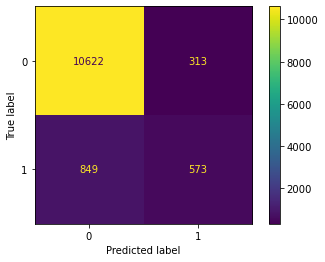

In [73]:
# Confusion Matrix of Logistic Regression
metrics.plot_confusion_matrix(logreg,X_test, y_test)

In [74]:
print_score(logreg, X_train, y_train, X_test, y_test, train=True) #printing the accuracy of the model over tain and test
print_score(logreg, X_train, y_train, X_test, y_test, train=False) #building the model on test data, not on train data,so train=False here 

Train Result:
Accuracy Score: 90.98%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.930166     0.648415  0.909819      0.789290      0.898718
recall         0.971421     0.419515  0.909819      0.695468      0.909819
f1-score       0.950346     0.509434  0.909819      0.729890      0.901133
support    25613.000000  3218.000000  0.909819  28831.000000  28831.000000
_______________________________________________
Confusion Matrix: 
 [[24881   732]
 [ 1868  1350]]

Test Result:
Accuracy Score: 90.60%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.925987     0.646727  0.905964      0.786357      0.893851
recall         0.971376     0.402954  0.905964      0.687165      0.905964
f1-score       0.948139     0.496534  0.905964      0.722336      0.896170
support   

- The answer to why Logistic Regression failed, is that the Linear Relationship doesn't exist.


In [75]:
# Decision tree test data metrics
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9131666262037711
Precision 0.6712463199214916
Recall 0.4810126582278481
f1_score 0.5604260548955347


- Recall has improved at 48% in Decision Trees as compared to mere 40% in Logistic Regression.

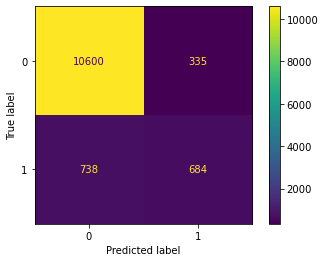

In [76]:
# Confusion Matrix of Decision Tree
metrics.plot_confusion_matrix(dtree, X_test, y_test)

In [77]:
print_score(dtree, X_train, y_train, X_test, y_test, train=True) #printing the accuracy of the model over tain and test
print_score(dtree, X_train, y_train, X_test, y_test, train=False) #building the model on test data, not on train data,so train=False here 

Train Result:
Accuracy Score: 92.05%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.941803     0.689910  0.920502      0.815856      0.913687
recall         0.970484     0.522685  0.920502      0.746584      0.920502
f1-score       0.955928     0.594767  0.920502      0.775347      0.915617
support    25613.000000  3218.000000  0.920502  28831.000000  28831.000000
_______________________________________________
Confusion Matrix: 
 [[24857   756]
 [ 1536  1682]]

Test Result:
Accuracy Score: 91.32%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.934909     0.671246  0.913167      0.803078      0.904568
recall         0.969364     0.481013  0.913167      0.725189      0.913167
f1-score       0.951825     0.560426  0.913167      0.756126      0.906784
support   

In [78]:
# Random Forest test data metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9008659059642308
Precision 0.7274826789838337
Recall 0.22151898734177214
f1_score 0.33962264150943394


- Poor recall value in Radom Forests.
- Results for RFs obtained are inferior to Decision Trees, because there is a lot of sample bias.
One of the reasons could be that for the RF & Decision Tree currently, the observations that have been considered to built these learners are actually not the true representative of the population.
So, the sampling did not work well while Bootstrapping.


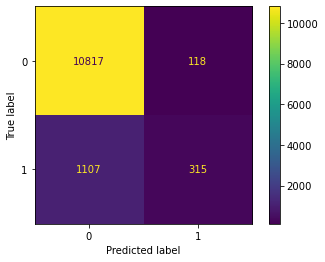

In [79]:
# Confusion Matrix of Random Forests
metrics.plot_confusion_matrix(rf,X_test, y_test)

In [80]:
print_score(rf, X_train, y_train, X_test, y_test, train=True) #printing the accuracy of the model over tain and test
print_score(rf, X_train, y_train, X_test, y_test, train=False) #building the model on test data, not on train data,so train=False here 

Train Result:
Accuracy Score: 90.87%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.913488     0.780441  0.908675      0.846964      0.898638
recall         0.991059     0.252952  0.908675      0.622006      0.908675
f1-score       0.950694     0.382070  0.908675      0.666382      0.887226
support    25613.000000  3218.000000  0.908675  28831.000000  28831.000000
_______________________________________________
Confusion Matrix: 
 [[25384   229]
 [ 2404   814]]

Test Result:
Accuracy Score: 90.09%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.907162     0.727483  0.900866      0.817322      0.886485
recall         0.989209     0.221519  0.900866      0.605364      0.900866
f1-score       0.946411     0.339623  0.900866      0.643017      0.876584
support   

In [81]:
# GBM test data metrics
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9117908877559278
Precision 0.6471631205673759
Recall 0.5133614627285513
f1_score 0.5725490196078431


- Recall value has improved, thus making GBM as one of the best models.

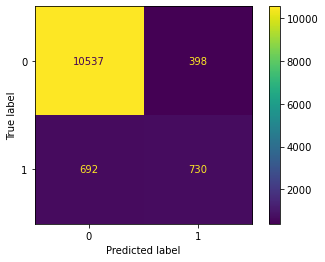

In [82]:
metrics.plot_confusion_matrix(gbm,X_test, y_test)

In [83]:
print_score(gbm, X_train, y_train, X_test, y_test, train=True) #printing the accuracy of the model over tain and test
print_score(gbm, X_train, y_train, X_test, y_test, train=False) #building the model on test data, not on train data,so train=False here 

Train Result:
Accuracy Score: 93.74%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.955359     0.762737  0.937394      0.859048      0.933859
recall         0.975091     0.637352  0.937394      0.806222      0.937394
f1-score       0.965124     0.694430  0.937394      0.829777      0.934910
support    25613.000000  3218.000000  0.937394  28831.000000  28831.000000
_______________________________________________
Confusion Matrix: 
 [[24975   638]
 [ 1167  2051]]

Test Result:
Accuracy Score: 91.18%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.938374     0.647163  0.911791      0.792768      0.904862
recall         0.963603     0.513361  0.911791      0.738482      0.911791
f1-score       0.950821     0.572549  0.911791      0.761685      0.907291
support   

In [84]:
# Stacking Classifier data metrics
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Accuracy: 0.9117099619648782
Precision 0.6670030272452069
Recall 0.4648382559774965
f1_score 0.5478657273104021


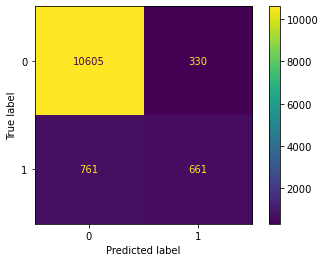

In [85]:
metrics.plot_confusion_matrix(clf,X_test, y_test)

In [86]:
print_score(clf, X_train, y_train, X_test, y_test, train=True) #printing the accuracy of the model over tain and test
print_score(clf, X_train, y_train, X_test, y_test, train=False) #building the model on test data, not on train data,so train=False here 

Train Result:
Accuracy Score: 93.27%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.948369     0.762747  0.932711      0.855558      0.927651
recall         0.977472     0.576445  0.932711      0.776959      0.932711
f1-score       0.962701     0.656637  0.932711      0.809669      0.928539
support    25613.000000  3218.000000  0.932711  28831.000000  28831.000000
_______________________________________________
Confusion Matrix: 
 [[25036   577]
 [ 1363  1855]]

Test Result:
Accuracy Score: 91.17%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.933046     0.667003   0.91171      0.800024      0.902431
recall         0.969822     0.464838   0.91171      0.717330      0.911710
f1-score       0.951078     0.547866   0.91171      0.749472      0.904678
support   

In [87]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.905964230800356
Precision 0.6467268623024831
Recall 0.4029535864978903
f1_score 0.49653379549393417


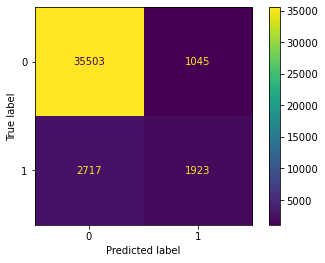

In [88]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [89]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9131666262037711
Precision 0.6712463199214916
Recall 0.4810126582278481
f1_score 0.5604260548955347


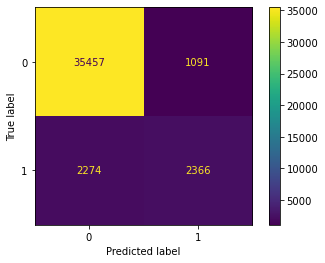

In [90]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [91]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9008659059642308
Precision 0.7274826789838337
Recall 0.22151898734177214
f1_score 0.33962264150943394


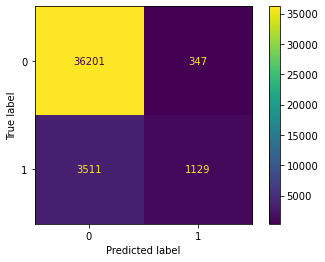

In [92]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [93]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9117908877559278
Precision 0.6471631205673759
Recall 0.5133614627285513
f1_score 0.5725490196078431


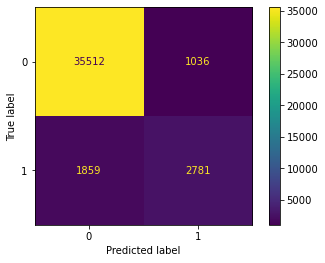

In [94]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [95]:
# Gains Chart Analysis/Lorenz Curve
# This will help understand the power of discrimination offered by the model's estimated probabilities

In [96]:
# Logistic Regression - Gains Chart

In [97]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.597475,0.637481,2461.0,2461.0,0.530388,0.530388,1658.0,1658.0,0.045365,0.045365,0.4850,0.100005,0.100005,1
1,9,4119,0.309784,0.243471,1276.0,3737.0,0.275000,0.805388,2843.0,4501.0,0.077788,0.123153,0.6822,0.100005,0.200010,2
2,8,4119,0.139597,0.098867,575.0,4312.0,0.123922,0.929310,3544.0,8045.0,0.096968,0.220121,0.7092,0.100005,0.300015,3
3,7,4118,0.053910,0.052393,222.0,4534.0,0.047845,0.977155,3896.0,11941.0,0.106600,0.326721,0.6504,0.099981,0.399995,4
4,6,4119,0.012139,0.033382,50.0,4584.0,0.010776,0.987931,4069.0,16010.0,0.111333,0.438054,0.5499,0.100005,0.500000,5
5,5,4119,0.005341,0.022327,22.0,4606.0,0.004741,0.992672,4097.0,20107.0,0.112099,0.550153,0.4425,0.100005,0.600005,6
6,4,4118,0.004614,0.016062,19.0,4625.0,0.004095,0.996767,4099.0,24206.0,0.112154,0.662307,0.3345,0.099981,0.699985,7
7,3,4119,0.002671,0.012511,11.0,4636.0,0.002371,0.999138,4108.0,28314.0,0.112400,0.774707,0.2244,0.100005,0.799990,8
8,2,4119,0.000971,0.010088,4.0,4640.0,0.000862,1.000000,4115.0,32429.0,0.112592,0.887299,0.1127,0.100005,0.899995,9
9,1,4119,0.000000,0.007764,0.0,4640.0,0.000000,1.000000,4119.0,36548.0,0.112701,1.000000,0.0000,0.100005,1.000000,10


- If Confusion Matrix is built with the probability cut-off of 13.96% instead of 50%, then the Recall should be somewhere in the 90s. This is evident by looking at the Actual_event_rate & cum_event_cap of the third row.
- In other words, Logistic Regression has not performed that badly. With 50% cutoff, it seems that its not doing that well.

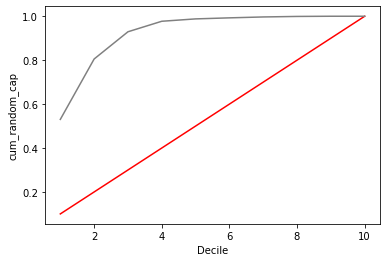

In [98]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

- Gains chart is looking good for Logistic Regression.

In [99]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.652100,0.656379,2686.0,2686.0,0.578879,0.578879,1433.0,1433.0,0.039209,0.039209,0.5397,0.100005,0.100005,1
1,9,4119,0.318767,0.306158,1313.0,3999.0,0.282974,0.861853,2806.0,4239.0,0.076776,0.115984,0.7459,0.100005,0.200010,2
2,8,4119,0.109250,0.099171,450.0,4449.0,0.096983,0.958836,3669.0,7908.0,0.100389,0.216373,0.7425,0.100005,0.300015,3
3,7,4118,0.025741,0.019970,106.0,4555.0,0.022845,0.981681,4012.0,11920.0,0.109773,0.326146,0.6555,0.099981,0.399995,4
4,6,4119,0.009468,0.004969,39.0,4594.0,0.008405,0.990086,4080.0,16000.0,0.111634,0.437780,0.5523,0.100005,0.500000,5
5,5,4119,0.006069,0.004969,25.0,4619.0,0.005388,0.995474,4094.0,20094.0,0.112017,0.549798,0.4457,0.100005,0.600005,6
6,4,4118,0.002671,0.004969,11.0,4630.0,0.002371,0.997845,4107.0,24201.0,0.112373,0.662170,0.3357,0.099981,0.699985,7
7,3,4119,0.001214,0.004969,5.0,4635.0,0.001078,0.998922,4114.0,28315.0,0.112564,0.774735,0.2242,0.100005,0.799990,8
8,2,4119,0.000486,0.004969,2.0,4637.0,0.000431,0.999353,4117.0,32432.0,0.112646,0.887381,0.1120,0.100005,0.899995,9
9,1,4119,0.000728,0.004536,3.0,4640.0,0.000647,1.000000,4116.0,36548.0,0.112619,1.000000,-0.0000,0.100005,1.000000,10


- For Decision Tree, cum_event_cap is 95%, which is an improvement.

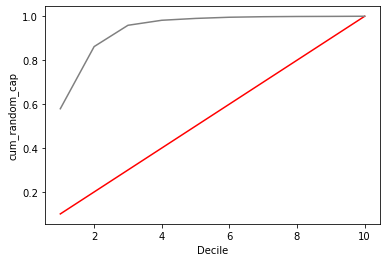

In [100]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [101]:
# Random Forest Lorenz Curve

In [102]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.589221,0.485946,2427.0,2427.0,0.523060,0.523060,1692.0,1692.0,0.046295,0.046295,0.4768,0.100005,0.100005,1
1,9,4119,0.342073,0.283831,1409.0,3836.0,0.303664,0.826724,2710.0,4402.0,0.074149,0.120444,0.7063,0.100005,0.200010,2
2,8,4119,0.142753,0.129202,588.0,4424.0,0.126724,0.953448,3531.0,7933.0,0.096613,0.217057,0.7364,0.100005,0.300015,3
3,7,4118,0.022341,0.062173,92.0,4516.0,0.019828,0.973276,4026.0,11959.0,0.110157,0.327214,0.6461,0.099981,0.399995,4
4,6,4119,0.019422,0.035022,80.0,4596.0,0.017241,0.990517,4039.0,15998.0,0.110512,0.437726,0.5528,0.100005,0.500000,5
5,5,4119,0.003884,0.030063,16.0,4612.0,0.003448,0.993966,4103.0,20101.0,0.112263,0.549989,0.4440,0.100005,0.600005,6
6,4,4118,0.002914,0.028409,12.0,4624.0,0.002586,0.996552,4106.0,24207.0,0.112345,0.662334,0.3342,0.099981,0.699985,7
7,3,4119,0.003156,0.023902,13.0,4637.0,0.002802,0.999353,4106.0,28313.0,0.112345,0.774680,0.2247,0.100005,0.799990,8
8,2,4119,0.000486,0.019468,2.0,4639.0,0.000431,0.999784,4117.0,32430.0,0.112646,0.887326,0.1125,0.100005,0.899995,9
9,1,4119,0.000243,0.017539,1.0,4640.0,0.000216,1.000000,4118.0,36548.0,0.112674,1.000000,0.0000,0.100005,1.000000,10


- Actual_event_rate for first decile is 58.9% for RF, as compared to 65.2% for Decision Tree. So, RF is underperforming to some extent.

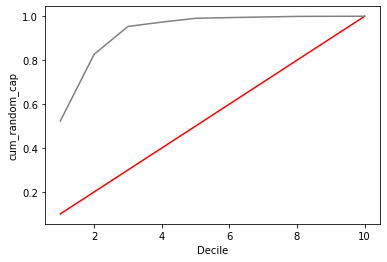

In [103]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [104]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.709395,0.676627,2922.0,2922.0,0.629741,0.629741,1197.0,1197.0,0.032751,0.032751,0.5970,0.100005,0.100005,1
1,9,4119,0.304686,0.309131,1255.0,4177.0,0.270474,0.900216,2864.0,4061.0,0.078363,0.111114,0.7891,0.100005,0.200010,2
2,8,4119,0.089099,0.087218,367.0,4544.0,0.079095,0.979310,3752.0,7813.0,0.102660,0.213774,0.7655,0.100005,0.300015,3
3,7,4118,0.019427,0.018770,80.0,4624.0,0.017241,0.996552,4038.0,11851.0,0.110485,0.324259,0.6723,0.099981,0.399995,4
4,6,4119,0.001942,0.007133,8.0,4632.0,0.001724,0.998276,4111.0,15962.0,0.112482,0.436741,0.5615,0.100005,0.500000,5
5,5,4119,0.001214,0.003865,5.0,4637.0,0.001078,0.999353,4114.0,20076.0,0.112564,0.549305,0.4500,0.100005,0.600005,6
6,4,4118,0.000486,0.002697,2.0,4639.0,0.000431,0.999784,4116.0,24192.0,0.112619,0.661924,0.3379,0.099981,0.699985,7
7,3,4119,0.000243,0.002367,1.0,4640.0,0.000216,1.000000,4118.0,28310.0,0.112674,0.774598,0.2254,0.100005,0.799990,8
8,2,4119,0.000000,0.002070,0.0,4640.0,0.000000,1.000000,4119.0,32429.0,0.112701,0.887299,0.1127,0.100005,0.899995,9
9,1,4119,0.000000,0.001370,0.0,4640.0,0.000000,1.000000,4119.0,36548.0,0.112701,1.000000,0.0000,0.100005,1.000000,10


- In GBM, Actual_event_rate of 70.9395% in the first decile is a significant improvement, as compared to Actual_event_rate of RF & Decision Trees. So, the cum_event_cap by the third decile is 97.93%.
- KS is maximised already by the second decile. Normally KS should be maximised by the third or fourth deciles. So, GBM looks like the best model to go with.
- Since KS got maximised by the first two deciles, taking the first two deciles to create a Target zone or the audience.


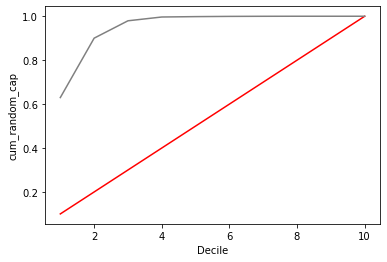

In [105]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [106]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting with retention offers in Telecom

In [107]:
df['Predicted_Response_Rank']=np.where(df['P_Rank_GBM']>8,"Top 2","Bottom 8")

In [108]:
df.groupby('contact')['target'].agg(['mean'])

,mean
contact,
cellular,0.147376
telephone,0.052313


- 'contact' makes a lot of sense.

In [109]:
df.groupby('Predicted_Response_Rank')['target'].agg(['mean'])

,mean
Predicted_Response_Rank,
Bottom 8,0.014052
Top 2,0.507041


In [110]:
df['Duration_Rank']=pd.qcut(df['duration'].rank(method='first').values,10,duplicates='drop').codes+1

In [111]:
df.groupby('Duration_Rank')['duration'].agg(['min','mean','max'])

,min,mean,max
Duration_Rank,,,
1,0,34.379947,59
2,59,74.382617,89
3,89,102.283321,116
4,116,130.867654,146
5,146,162.387958,180
6,180,199.750182,222
7,222,248.925692,280
8,280,320.676863,368
9,368,445.551833,551


- Took 'Duration', and divided it into 10 groups. Grouping by duration to see minimum-maximum & average duration for every single rank. Intent is to see average duration of a call in the overall data, so that buckets can be created.

In [112]:
df['duration'].mean() # average duration of a call in the overall data

258.2850101971448

- 258 lies somewhere between 6th & 7th Duration_Ranks. Anybody falling in 8th, 9th & 10th can be called as 'High Duration'. 
- Anybody falling in Upto 7th can be called as 'Low Duration'. 
- This way some sort of priority order can be given to the Telemarketing team.
- Recommendations like "Go after these people in this priority. We know that you don't have limited resources. Go by this prioritisation, and you should be okay"

In [113]:
df['duration_segment']=np.where(df['Duration_Rank']>7,"High Duration","Low Duration")
df.duration_segment.value_counts()

Low Duration     28831
High Duration    12357
Name: duration_segment, dtype: int64

In [114]:
pd.crosstab(index=df['duration_segment'], columns=df['Predicted_Response_Rank'],values=df['Predicted_Response_Rank'],aggfunc='count')

Predicted_Response_Rank,Bottom 8,Top 2
duration_segment,,
High Duration,6491,5866
Low Duration,26459,2372


In [115]:
###### Recommendations ##########
# Phase 1 - Speak to customers who falls in top 2 predicted ranks(deciles) and also are in High Duration segment
# Similarly - Phase 2 ( Top 2 , Low Duration)
# Phase 3 - Bottom 7 and High Duration (randomly select 25% of them only)